In [1]:
import sys
sys.path.append('/Users/Jason/Developer/Classes/NeuroData/bloby')
sys.path.append('../../util')
sys.path.append('../..')
from BlobDetector import BlobDetector
from tifffile import imread
from Grapher import Grapher
IMG_DIR = './img/'

## Running the HDoG detection algorithm

In [2]:
orig_img = imread(IMG_DIR + 'blurred_320_randomized_gauss_cells.tif')
grey_img = orig_img[:, 500:600, 500:600, 0]

detected_blobs = BlobDetector.detect_3d_blobs(grey_img, 0.01, dark_blobs=0)

100% (1 of 1) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00


Computing DoG at scales [ 0.01]
Processing for scale: 0.01



| 7043 Elapsed Time: 0:00:00                                                   

Computing hessian at each pixel


| 999999 Elapsed Time: 0:00:21                                                 
| 4438 Elapsed Time: 0:00:00                                                   

117277 concave points found

Finding connected components


| 117276 Elapsed Time: 0:00:03                                                 
| 498 Elapsed Time: 0:00:00                                                    

926 connected components found

Finding blob desciptors for connected components


| 925 Elapsed Time: 0:00:00                                                    


Done computing blob descriptors

Running post pruning
12 blobs are detected


## Save outputs in tif stack and centers in csv

In [3]:
BlobDetector.draw_blobs(orig_img[:,500:600, 500:600,:], detected_blobs, 'drawn_output')
BlobDetector.save_centers(detected_blobs, "output_centers")

Saved tif as:  drawn_output.tif  at  ./img/drawn_output.tif
Saved csv as:  output_centers.csv  at  ./centers/output_centers.csv


## openning up the files and visualizing

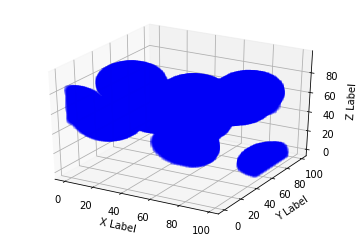

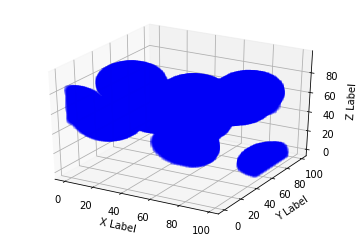

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the img first
z_range, y_range, x_range = 100,100,100
x_coord, y_coord, z_coord = [],[],[]
for i in range(z_range):
    for j in range(y_range):
        for k in range(x_range):
            if orig_img[i,j+500,k+500,0] > 0:
                x_coord.append(k)
                y_coord.append(j)
                z_coord.append(i)
ax.scatter(x_coord, y_coord, z_coord, c='b', marker=',', alpha=0.1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


# Plot the detected blobs
ax = fig.add_subplot(111, projection='3d')
x_coord, y_coord, z_coord = [],[],[]
for i, j, k in detected_blobs:
    x_coord.append(k)
    y_coord.append(j)
    z_coord.append(i)
ax.scatter(x_coord, y_coord, z_coord, c='r', marker=',')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


In [13]:
import csv
with open('./centers/output_centers.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        print("Blob {} at {}".format(i+1,row))

Blob 1 at ['3', '72', '97']
Blob 2 at ['79', '38', '22']
Blob 3 at ['68', '50', '79']
Blob 4 at ['48', '6', '78']
Blob 5 at ['67', '57', '53']
Blob 6 at ['34', '86', '35']
Blob 7 at ['62', '61', '6']
Blob 8 at ['61', '78', '76']
Blob 9 at ['49', '48', '36']
Blob 10 at ['56', '12', '23']
Blob 11 at ['70', '3', '4']
Blob 12 at ['71', '13', '81']
